In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython import display

In [2]:
display.set_matplotlib_formats('svg')

D:\Software\Anaconda\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  """Entry point for launching an IPython kernel.


In [3]:
train_data = pd.read_csv('../raw_data/train.csv')
train_fact_l = train_data.iloc[:, 1].tolist()

#### 1.分析文本长度

In [19]:
def plot_len(fact_l):
    len_dic = {}
    for fact in fact_l:
        segs_len = len(fact)
        if segs_len in len_dic:
            len_dic[segs_len] += 1
        else:
            len_dic[segs_len] = 1
    len_dic = sorted(len_dic.items(), key=lambda x: x[0])
    p_num = len(fact_l)
    x = np.array([item[0] for item in len_dic])
    y = np.array([item[1] for item in len_dic])
    y_p = np.zeros(5)
    for i in range(len(x)):
       # print((x[i] - 1) / 200)
        y_p[min(int((x[i] - 1) / 200) - 1, 4)] += y[i]
    
    figure = plt.figure(figsize=(10, 5))
    axes = figure.subplots(1,2)
     # 折线图
    axes[0].plot(x, y.cumsum())
    axes[0].set_xlabel(f"len")
    axes[0].set_ylabel(f"num")
    # 饼图
    labels = []
    for i in range(4):
        labels.append(f'{(i + 1) * 200}~{(i + 2) * 200}')
    labels += ['1000+']
    print(y_p)
    axes[1].pie(((y_p / p_num) * 100).astype(int), labels=labels, autopct='%.2f%%')
    plt.show()

[ 7109. 21304. 14961.  5141.  1486.]


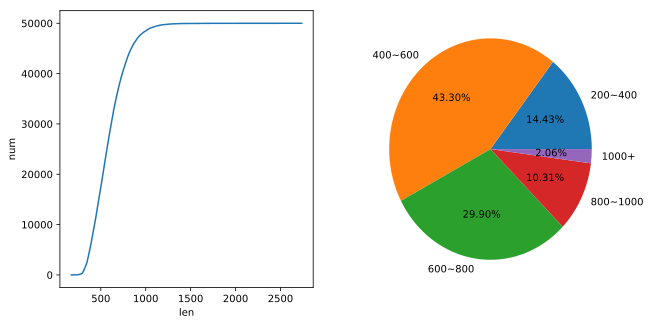

In [20]:
plot_len(train_fact_l)

#### 2.分析每类文本的数量

In [16]:
def t(df):
    temp_df = df.sort_values(by=['label'])
   # print(temp_df)
    labels = temp_df['label']
    label_dic = {}
    for i in range(labels.shape[0]):
        if labels.iloc[i] in label_dic:
            label_dic[labels.iloc[i]] += 1
        else:
            label_dic[labels.iloc[i]] = 1
    label_dic = sorted(label_dic.items(), key=lambda x: x[0])
    #print(label_dic)
    ratio = [item[1] for item in label_dic]
    labels = [item[0] for item in label_dic]
    figure = plt.figure(figsize=(6, 6))
    axes = figure.subplots(1,1)
    axes.pie(ratio, labels=labels, autopct='%.0f%%')
    plt.show()

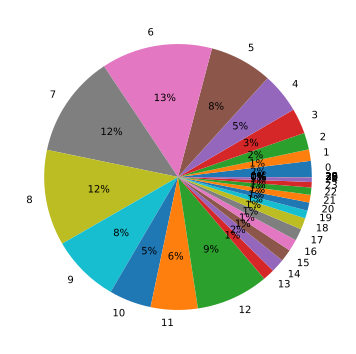

In [18]:
t(train_data.iloc[:])